In [162]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import time
import random
from numba import njit

# Ex.1: The stock market (Q1)

In [28]:
def stock_market(init):
    '''0: Bull market
       1: Bear market
       2: Stagnant market'''
    
    if(init==0):
        p_bull = 0.9
        p_bear = 0.075
        p_stagnant = 0.025
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bull):
            extract = 0
        if((random_num>p_bull) & (random_num<=p_bull+p_bear)):
            extract = 1
        if((random_num>p_bull+p_bear)):
            extract = 2
        
    if(init==1):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bear):
            extract = 1
        if((random_num>p_bear) & (random_num<=p_bull+p_bear)):
            extract = 0
        if((random_num>p_bull+p_bear)):
            extract = 2
    
    if(init==2):    
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_stagnant):
            extract = 2
        if((random_num>p_stagnant) & (random_num<=p_stagnant+p_bear)):
            extract = 0
        if((random_num>p_stagnant+p_bear)):
            extract = 1
    
    return extract 

def Markov_chain_stock(N_samples):
    # define the chain to be filled:
    chain_frac = np.zeros((N_samples,3))
    
    frac_bull = np.zeros(N_samples)
    frac_bear = np.zeros(N_samples)
    frac_stag = np.zeros(N_samples)
    
    #extract the first random state:
    first_extract = int(np.random.uniform(0,3))
    chain_frac[0,first_extract] = 1
    
    if(first_extract==0):
        initial_stock = 'Bull'
    
    if(first_extract==1):
        initial_stock = 'Bear'
    
    if(first_extract==2):
        initial_stock = 'Stagnant'
    
    frac_bull[0] = np.sum(chain_frac[:,0])
    frac_bear[0] = np.sum(chain_frac[:,1])
    frac_stag[0] = np.sum(chain_frac[:,2])
    
    last_extract = first_extract
    
    # run the algorithm N times
    for i in range(1,N_samples):
        
        extracted_market = stock_market(last_extract)
        
        chain_frac[i,extracted_market] = 1
        last_extract = extracted_market
        
        frac_bull[i] = np.sum(chain_frac[:,0])/i
        frac_bear[i] = np.sum(chain_frac[:,1])/i
        frac_stag[i] = np.sum(chain_frac[:,2])/i
        
    return frac_bull,frac_bear,frac_stag,initial_stock

@njit
def c_stock_market(init):
    '''0: Bull market
       1: Bear market
       2: Stagnant market'''
    
    if(init==0):
        p_bull = 0.9
        p_bear = 0.075
        p_stagnant = 0.025
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bull):
            extract = 0
        if((random_num>p_bull) & (random_num<=p_bull+p_bear)):
            extract = 1
        if((random_num>p_bull+p_bear)):
            extract = 2
        
    if(init==1):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bear):
            extract = 1
        if((random_num>p_bear) & (random_num<=p_bull+p_bear)):
            extract = 0
        if((random_num>p_bull+p_bear)):
            extract = 2
    
    if(init==2):    
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_stagnant):
            extract = 2
        if((random_num>p_stagnant) & (random_num<=p_stagnant+p_bear)):
            extract = 0
        if((random_num>p_stagnant+p_bear)):
            extract = 1
    
    return extract 

@njit
def c_MCstock(N_samples):
    # define the chain to be filled:
    chain_frac = np.zeros((N_samples,3))
    
    frac_bull = np.zeros(N_samples)
    frac_bear = np.zeros(N_samples)
    frac_stag = np.zeros(N_samples)
    
    #extract the first random state:
    first_extract = int(np.random.uniform(0,3))
    chain_frac[0,first_extract] = 1
    
    if(first_extract==0):
        initial_stock = 'Bull'
    
    if(first_extract==1):
        initial_stock = 'Bear'
    
    if(first_extract==2):
        initial_stock = 'Stagnant'
    
    frac_bull[0] = np.sum(chain_frac[:,0])
    frac_bear[0] = np.sum(chain_frac[:,1])
    frac_stag[0] = np.sum(chain_frac[:,2])
    
    last_extract = first_extract
    
    # run the algorithm N times
    for i in range(1,N_samples):
        
        extracted_market = c_stock_market(last_extract)
        
        chain_frac[i,extracted_market] = 1
        last_extract = extracted_market
        
        frac_bull[i] = np.sum(chain_frac[:,0])/i
        frac_bear[i] = np.sum(chain_frac[:,1])/i
        frac_stag[i] = np.sum(chain_frac[:,2])/i
        
    return frac_bull,frac_bear,frac_stag,initial_stock

In [29]:
N = 10000

In [30]:
%timeit Markov_chain_stock(N)

1.44 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
frac_bull,frac_bear,frac_stag,initial_stock = Markov_chain_stock(N)

Text(0.5, 1.0, 'Fraction of stock market states: Bear market as init')

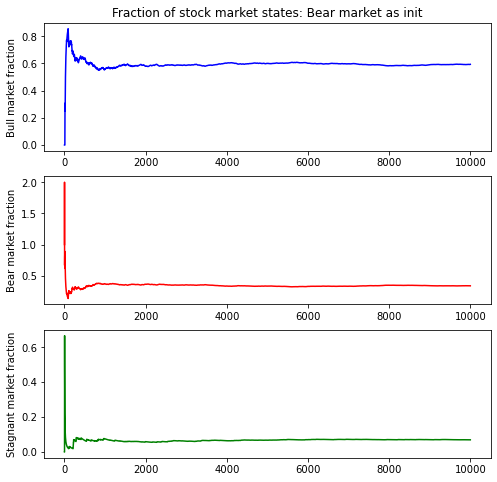

In [32]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,8))

ax[0].plot(frac_bull,color='blue')
ax[1].plot(frac_bear,color='red')
ax[2].plot(frac_stag,color='green')
    
ax[0].set_ylabel('Bull market fraction')
ax[1].set_ylabel('Bear market fraction')
ax[2].set_ylabel('Stagnant market fraction')

ax[0].set_title('Fraction of stock market states: %s market as init'%initial_stock)

now try to use numba...

In [33]:
%timeit c_MCstock(N)

792 ms ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
frac_bull_numba,frac_bear_numba,frac_stag_numba,initial_stock_numba = c_MCstock(N)

Text(0.5, 1.0, 'Fraction of stock market states with numba: Stagnant market as init')

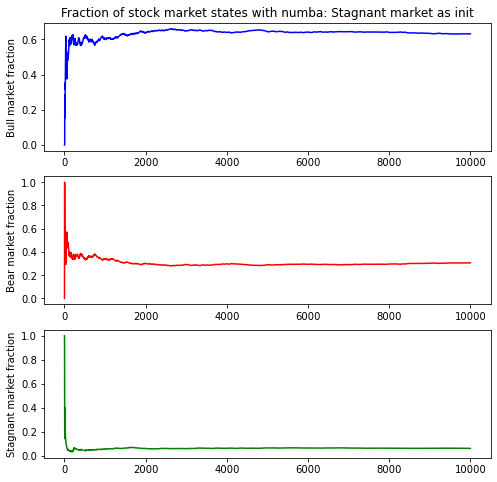

In [35]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,8))

ax[0].plot(frac_bull_numba,color='blue')
ax[1].plot(frac_bear_numba,color='red')
ax[2].plot(frac_stag_numba,color='green')
    
ax[0].set_ylabel('Bull market fraction')
ax[1].set_ylabel('Bear market fraction')
ax[2].set_ylabel('Stagnant market fraction')

ax[0].set_title('Fraction of stock market states with numba: %s market as init'%initial_stock_numba)

# Ex.2: Consistent plotting (Q2)

In [20]:
%timeit MC_stock_numba

85.9 ns ± 18 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [306]:
def my_plot(plotting_func):
    
    def wrapper(*args):
        # set the rc params for plotting
        with mpl.rc_context({"font.family" : "serif", 
                              "mathtext.fontset" : "cm",
                              "font.size" : 11,
                              "figure.figsize" : [6,6],
                              "lines.linewidth" : 1,
                              "axes.prop_cycle" : cycler(color=['black','red','blue','orange','green']),
                            }):
            
            # build the figure object
            fig = plt.figure()
    
            # create the axis for the plot
            ax = fig.add_subplot(111)
    
            ax.set_xlabel(args[2])
            ax.set_ylabel(args[3])
            ax.set_title(args[4])
        
            # call the function
            plotting_func(*args)
    
        # save the plot
        plt.savefig('%s.pdf'%args[4])
        
    return wrapper
    
    
@my_plot
def plot_funct(x,y,x_label,y_label,title):
    """This function returns a matplotlib figure object"""
    
    return plt.plot(x,y)

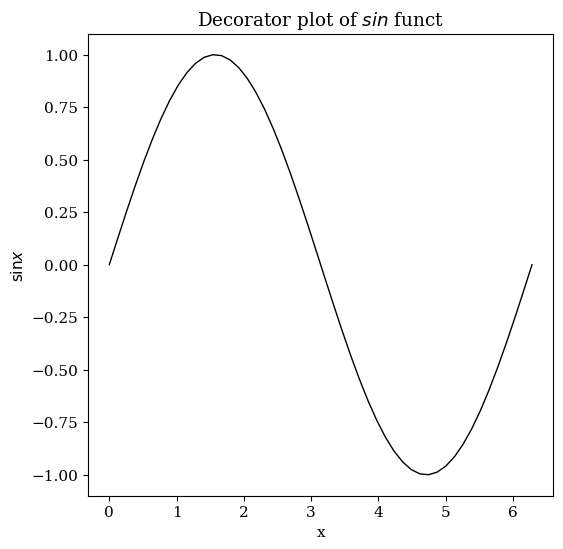

In [307]:
x = np.linspace(0,2*np.pi)
y = np.sin(x)

x_label = 'x'
y_label = r'$\sin{x}$'
title = r'Decorator plot of $sin$ funct'

plot_funct(x,y,x_label,y_label,title)

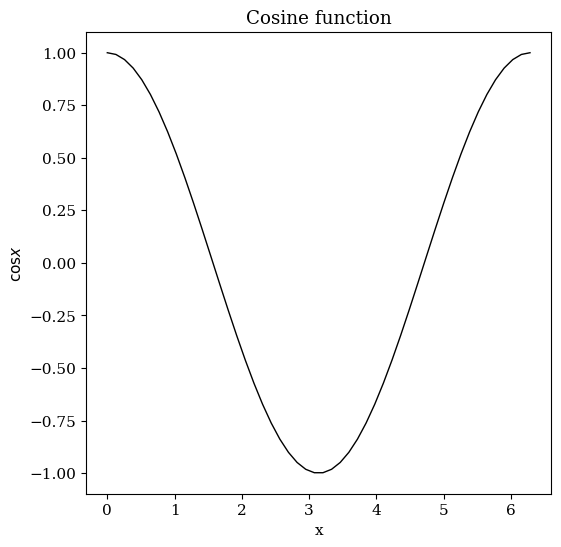

In [308]:
plot_funct(x,np.cos(x),x_label,r'$\cos{x}$','Cosine function')

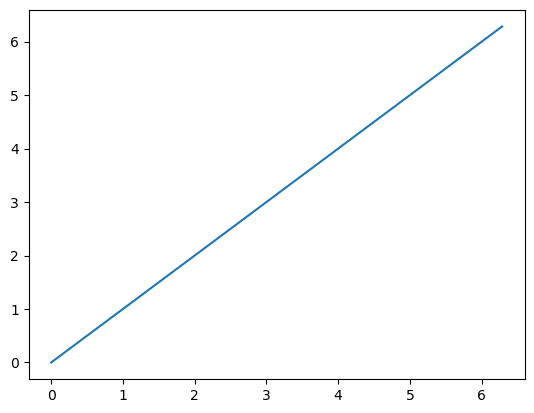

In [309]:
# check the rc parameters are not changed overall
plt.plot(x,x)